# Tugas Pembersihan Data
```
Dibuat Pada: 29-09-2021
Oleh: Muhammad Azar Nuzy
NIM: 2004191
Kelas: Ilmu Komputer-C1
```

File ini dibuat untuk memenuhi salah tugas Mata Kuliah Data Mining & Warehouse 

## Load Dataset
Load dataset menggunakan pandas. Pandas sebagai library untuk melakukan preprocessing dan analisis data

In [83]:
# function read_csv digunakan untuk membaca csv file dan menjadikannya sebagai data frame
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Dataset/BL-Flickr-Images-Book.csv")
df.head(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [84]:
# function rename berfungsi untuk mengubah nama kolom
# inplace = true dapat berlaku untuk semua run setelahnya, sedangkan inplace = false hanya berlaku untuk saat itu saja
df.rename(columns = {'Date of Publication': 'Year'}, inplace = True)
df.head()

,Identifier,Edition Statement,Place of Publication,Year,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [85]:
to_drop = ['Edition Statement', 
           'Corporate Author', 
           'Corporate Contributors', 
           'Former owner', 
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']
# drop berfungsi untuk menyembunyikan spesifik kolom pada tabel
df.drop(to_drop, inplace = True, axis = 1)
df.head()

,Identifier,Place of Publication,Year,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [86]:
df['Year'].head(20)

0     1879 [1878]
1            1868
2            1869
3            1851
4            1857
5            1875
6            1872
7             NaN
8            1676
9            1679
10           1802
11           1859
12           1888
13    1839, 38-54
14           1897
15           1865
16        1860-63
17           1873
18           1866
19           1899
Name: Year, dtype: object

In [87]:
# extract berfungsi untuk menampilkan string yang diinginkan sehingga keluaran mempunyai format yang sama
extr = df['Year'].str.extract(r'^(\d{4})', expand=False)
extr.head(20)


0     1879
1     1868
2     1869
3     1851
4     1857
5     1875
6     1872
7      NaN
8     1676
9     1679
10    1802
11    1859
12    1888
13    1839
14    1897
15    1865
16    1860
17    1873
18    1866
19    1899
Name: Year, dtype: object

In [88]:
# untuk mengambil nilai boolean apakah 5 data teratas mengandung London pada kolom 'Place of Publication'
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]


0    True
1    True
2    True
3    True
4    True
Name: Place of Publication, dtype: bool

In [89]:
# untuk mengambil nilai boolean apakah 5 data teratas mengandung oxford pada kolom 'Place of Publication'
pub = df['Place of Publication']
oxford = pub.str.contains('Oxford')
oxford[:5]

0    False
1    False
2    False
3    False
4    False
Name: Place of Publication, dtype: bool

In [90]:
# library numpy digunakan untuk berbagai operasi pada matematika, scientific computing, dll

import numpy as np
df['Place of Publication'] = np.where(london, 'London',
                             np.where(oxford, 'Oxford',
                             pub.str.replace('-', ' ')))
df.head(20)


,Identifier,Place of Publication,Year,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
5,481,London,1875,William Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
6,519,London,1872,The Author,Lagonells. By the author of Darmayne (F. E. A....,"A., F. E.",http://www.flickr.com/photos/britishlibrary/ta...
7,667,Oxford,NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
8,874,London,1676,NaN,"A Warning to the inhabitants of England, and L...",Remaʿ.,http://www.flickr.com/photos/britishlibrary/ta...
9,1143,London,1679,NaN,A Satyr against Vertue. (A poem: supposed to b...,"A., T.",http://www.flickr.com/photos/britishlibrary/ta...


In [91]:
#iloc untuk menampilkan baris yang kita inginkan dari tabel
df.iloc[2]

Identifier                                                            218
Place of Publication                                               London
Year                                                                 1869
Publisher                                           Bradbury, Evans & Co.
Title                   Love the Avenger. By the author of “All for Gr...
Author                                                          A., A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 2, dtype: object

In [92]:
#pengecekan primary key
df['Identifier'].is_unique

True

In [93]:
df.set_index('Identifier', inplace = True)

In [94]:
# df.loc[218]
df.iloc[218]

Place of Publication                                           Providence
Year                                                                 1899
Publisher                                            Preston & Rounds Co.
Title                   Diary of Colonel Israel Angell, commanding the...
Author                                                    ANGELL, Israel.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 87222, dtype: object

## Latihan 11
Dataset yang diambil berasal dari [athlete_events.csv](https://drive.google.com/file/d/1GB9tfDGEEfRzsx1LvimfNNUtvXUDW8qc/view?usp=sharing)
```
Patut diduga rata-rata tinggi badan dan berat badan bergantung pada gender. Oleh karena itu akan
lebih akurat jika data yang kosong diisi dengan median sesuai atribut Sex. Buat kode untuk melihat
apakah dugaan ini benar, dan buat kode untuk mengisi berdasarkan median atribut Sex.
```
```
Petunjuk: Gunakan loc seperti berikut untuk mengisi setelah rata-rata dihitung.
df.loc[df.Sex=="M","Height"].fillna(avg_height_m)
```

In [95]:
df1 = pd.read_csv("/content/drive/MyDrive/Dataset/athlete_events.csv")

# Pengecekan awal
df1[(df1.Sex=="M") | (df1.Sex=="F") | (df1.Height.isnull()) | (df1.Weight.isnull())]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [96]:


# Menetapkan nilai median untuk tinggi badan dan berat badan pria
median_height_m = df1.loc[df1.Sex == 'M']['Height'].median()
median_weight_m = df1.loc[df1.Sex == 'M']['Weight'].median()
# Menetapkan nilai median untuk tinggi badan dan berat badan wanita
median_height_f = df1.loc[df1.Sex == 'F']['Height'].median()
median_weight_f = df1.loc[df1.Sex == 'F']['Weight'].median()

# Memasukan nilai di atas ke data yang kosong
df1.loc[df1.Sex=="M", "Height"] = df1.loc[(df1.Sex=="M", "Height")].fillna(median_height_m)
df1.loc[df1.Sex=="M", "Weight"] = df1.loc[(df1.Sex=="M", "Weight")].fillna(median_weight_m)
df1.loc[df1.Sex=="F", "Height"] = df1.loc[(df1.Sex=="F", "Height")].fillna(median_height_f)
df1.loc[df1.Sex=="F", "Weight"] = df1.loc[(df1.Sex=="F", "Weight")].fillna(median_weight_f)

# Untuk Melakukan Pengecekan akhir
df1[(df1.Sex=="M") | (df1.Sex=="F") | (df1.Height.isnull()) | (df1.Weight.isnull())]




,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Latihan 12
Dataset yang diambil berasal dari [athlete_events.csv](https://drive.google.com/file/d/1GB9tfDGEEfRzsx1LvimfNNUtvXUDW8qc/view?usp=sharing)
```
Coba analisis outlier atribut lain
```


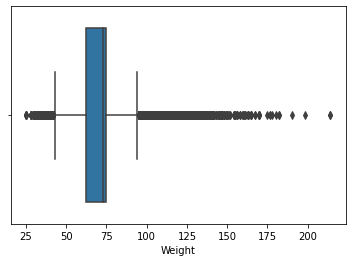

In [97]:
# melihat nilai weight menggunakan boxplot
sns.boxplot(x="Weight", data=df1)

In [98]:
# mengecek berat yang sangat rendah yaitu < 30 atau berat yang sangat besar > 190

df1[(df1.Weight<30) | (df1.Weight>190)][["Weight","Year","Event"]]


,Weight,Year,Event
23155,214.0,2008,Judo Men's Heavyweight
23156,214.0,2012,Judo Men's Heavyweight
40849,25.0,1980,Gymnastics Women's Individual All-Around
40850,25.0,1980,Gymnastics Women's Team All-Around
40851,25.0,1980,Gymnastics Women's Floor Exercise
40852,25.0,1980,Gymnastics Women's Horse Vault
40853,25.0,1980,Gymnastics Women's Uneven Bars
40854,25.0,1980,Gymnastics Women's Balance Beam
109863,28.0,1980,Gymnastics Women's Individual All-Around
109864,28.0,1980,Gymnastics Women's Team All-Around


### Kesimpulan dari data di atas
Berat badan atlet yang kurang dari 30 kg merupakan atlet yang memang mengikuti olahraga yang membutuhkan berat yang ringan seperti kebanyakan atlet gymnastic, dan juga berat badan yang lebih dari 190 kg juga event yang diikuti nya merupakan olahraga yang berat seperti judo. Selain itu, jika terdapat data dari olahraga lain yang berat nya tidak sesuai dengan event yang diikuti maka perlu dipertanyakan kebenaran dari data tersebut

## Latihan 13
Dataset yang diambil berasal dari [athlete_events.csv](https://drive.google.com/file/d/1GB9tfDGEEfRzsx1LvimfNNUtvXUDW8qc/view?usp=sharing)
```
Atribut apa saja yang dapat ditambahkan berdasarkan atribut yang ada? (tentu yang kira-kira relevan
dengan perolehan medali). Tulis sebanyak-banyaknya dan buat code-nya.

```


In [99]:
df1["Honor Points"] = df1.apply(lambda row: 1 if row.Medal == "Gold" else 0, axis = 1 )
df1["Honor Points"] = df1["Honor Points"].astype("category")
df1[['Medal', 'Honor Points']]

,Medal,Honor Points
0,NaN,0
1,NaN,0
2,NaN,0
3,Gold,1
4,NaN,0
...,...,...
271111,NaN,0
271112,NaN,0
271113,NaN,0
271114,NaN,0


In [100]:
df1['Periode'] = df1.apply(lambda row: 0 if row.Year>1945 else 1, axis=1)
df1["Periode"] = df1["Periode"].astype("category")
df1[['Year','Periode']].head() 

,Year,Periode
0,1992,0
1,2012,0
2,1920,1
3,1900,1
4,1988,0


## Latihan 14
Dataset atlet Olimpiade 2020 yang diambil berasal dari [athletes.xlsx](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo
)
```
Olimpiade di dataframe ini hanya mencakup sampai tahun 2016, coba gabungan data atlet pada 2020
Tokyo.


```


In [101]:
# membaca file
df2 = pd.read_excel("/content/drive/MyDrive/Dataset/Athletes.xlsx")

# merubah kolom NOC menjadi team dan Discipline menjadi Sport
df2.rename(columns={"NOC":"Team","Discipline":"Sport"}, inplace=True)

# merge file
df1 = pd.merge(df1, df2, how='outer', on=["Name","Team","Sport"])
# df2.head(10)
